<a href="https://colab.research.google.com/github/vaishnavisureshbabu010905/ml-lab/blob/main/exp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def generate_data(n_samples=300,n_centers=4,random_seed=42):
  np.random.seed(random_seed)
  points_per_center=n_samples//n_centers
  centers=np.random.uniform(-10,10,(n_centers,2))
  X=np.vstack([center+np.random.randn(points_per_center,2)for center in centers])
  return X

In [21]:
def euclidean_distance(a,b):
  return np.sqrt(np.sum((a-b)**2))

In [4]:
def compute_distance_matrix(X):
  n_samples = X.shape[0]
  distance_matrix = np.zeros((n_samples, n_samples))
  for i in range(n_samples):
    for j in range(i + 1, n_samples):
      distance_matrix[i, j] = euclidean_distance(X[i], X[j])
      distance_matrix[j, i] = distance_matrix[i, j]
  return distance_matrix

In [10]:
def hierarchical_clustering(X):
  distances=compute_distance_matrix(X)
  n_samples=len(X)
  clusters = [(i,) for i in range(n_samples)]
  while len(clusters) > 1:
      min_dist = float('inf')
      to_merge = (None, None)

      for i in range(len(clusters)):
          for j in range(i + 1, len(clusters)):
              # Calculate the minimum distance between clusters[i] and clusters[j]
              d = np.min([distances[p][q] for p in clusters[i] for q in clusters[j]])
              if d < min_dist:
                  min_dist = d
                  to_merge = (i, j)

      # Merge the two closest clusters
      i, j = to_merge
      clusters[i] = clusters[i] + clusters[j]
      del clusters[j]

  return clusters

In [11]:
def extract_clusters(clusters, n_samples):
    labels = np.zeros(n_samples)
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_id
    return labels

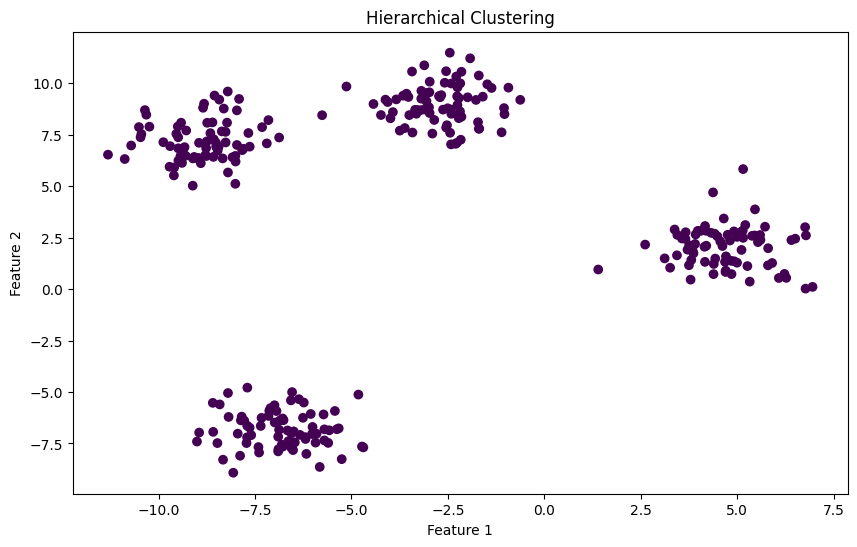

In [26]:
X = generate_data()
final_clusters = hierarchical_clustering(X)

cluster_labels = extract_clusters(final_clusters, len(X))

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()